# Pre-Parcial - Taller en Python: Series de Tiempo, Joins, Visualización, Pivot Tables, y Storytelling (100 Puntos)

### CORRA LA SIGUIENTE LINEA SOLO UNA VEZ

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/europe_players.zip
!unzip europe_players.zip
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Match.csv.zip
!unzip Match.csv.zip

--2024-10-18 04:16:14--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/europe_players.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/europe_players.zip [following]
--2024-10-18 04:16:15--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/europe_players.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4840920 (4.6M) [application/zip]
Saving to: ‘europe_players.zip’

europe_players.zip  100%[===================>]   4.62M  --.-KB/s    in 0.08s   

2024-10-18 04:16:15 (55.3 M

##Parte 1: Exploración Inicial de los Datos y Análisis de Medias (20 Puntos)


1.1 Cargar y Unir Tablas (10 Puntos)
Empezamos cargando las tablas y uniéndolas para facilitar el análisis. En esta etapa se enfoca en unir la tabla de partidos con la de equipos y atributos.

Base de Datos:
Las tablas disponibles son:

*   Country (11 filas, 2 columnas)
*   League (11 filas, 3 columnas)
*   Match (25,979 filas, 115 columnas)
*   Player (11,060 filas, 7 columnas)
*   Player_Attributes (183,978 filas, 42 columnas)
*   Team (299 filas, 5 columnas)
*   Team_Attributes (1,458 filas, 25 columnas)

In [2]:
import pandas as pd
data = pd.read_csv('Match.csv')
data.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [10]:
import pandas as pd

match_df = pd.read_csv('Match.csv')
team_df = pd.read_csv('Team.csv')
team_attributes_df = pd.read_csv('Team_Attributes.csv')

# Convert 'date' columns to datetime objects if they are not already
match_df['date'] = pd.to_datetime(match_df['date'])
team_attributes_df['date'] = pd.to_datetime(team_attributes_df['date'])


merged_df = pd.merge(match_df, team_df[['team_api_id', 'team_long_name']], left_on='home_team_api_id', right_on='team_api_id', how='left')
merged_df = merged_df.rename(columns={'team_long_name': 'home_team_name'})
merged_df = pd.merge(merged_df, team_df[['team_api_id', 'team_long_name']], left_on='away_team_api_id', right_on='team_api_id', how='left')
merged_df = merged_df.rename(columns={'team_long_name': 'away_team_name'})

Pregunta de Negocio:

¿Cómo afecta la localía o el hecho de ser visitante en el rendimiento de los equipos? ¿Cuáles son los equipos que tienden a ganar más en casa o fuera de ella?

1.2 Análisis de Medias (10 Puntos)
Antes de realizar análisis complejos, obtenemos algunas estadísticas descriptivas que nos den una visión general de los datos. Calculemos las medias de goles en casa y fuera de casa.

In [11]:
avg_home_goals = final_df['home_team_goal'].mean()
avg_away_goals = final_df['away_team_goal'].mean()

print(f"Average Home Goals: {avg_home_goals}")
print(f"Average Away Goals: {avg_away_goals}")



Average Home Goals: 1.5445937103044767
Average Away Goals: 1.1609376804341969


Pregunta de Negocio:

¿Qué implicaciones tiene el hecho de que la media de goles locales sea mayor o menor que la de visitantes? ¿Cómo puede afectar esto las decisiones tácticas y estrategias de los equipos?

Que la media de goles de local del equipo sea mayor quiere decir que jugando de local tienen una ventaja la cual aún no es significativa en comparación con el promedio de goles de visitante, pero puede aprovecharse para el desarrollo de tácticas en casa, aprovechando las carcterísticas del ambiente local.

##Parte 2: Series de Tiempo y Tendencias Temporales (20 Puntos)


2.1 Análisis de Tendencias Temporales (10 Puntos)
Convertimos la columna de fechas en un formato de tiempo y analizamos la evolución de los goles anotados por temporada, tanto locales como visitantes. Esto ayudará a detectar si hay fluctuaciones en el rendimiento a lo largo del tiempo.

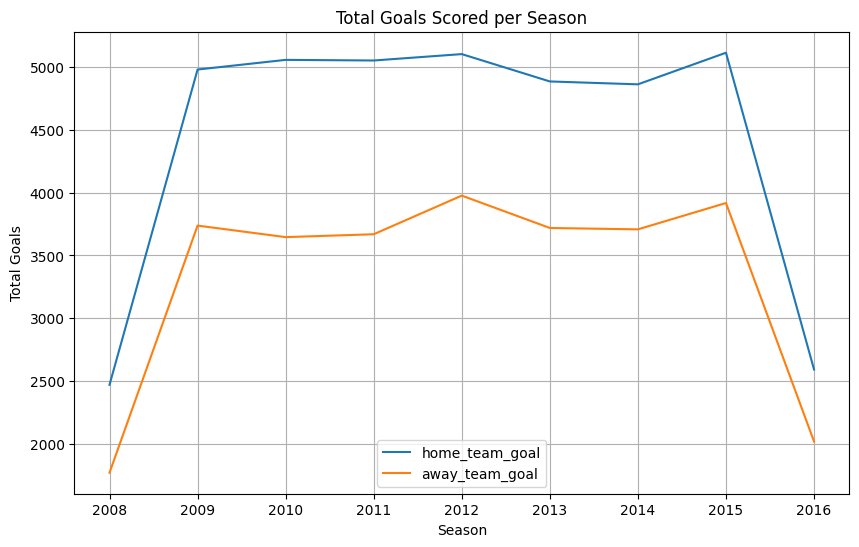

In [15]:
if 'home_date' not in final_df.columns:
    raise KeyError(f"Column 'home_date' not found in DataFrame. Available columns: {final_df.columns.tolist()}")

final_df['date'] = pd.to_datetime(final_df['home_date'])

# Extraer la temporada
final_df['season'] = final_df['date'].dt.year
import matplotlib.pyplot as plt
ptl = final_df.groupby('season')[['home_team_goal', 'away_team_goal']].sum()
ptl.plot(kind='line', figsize=(10, 6))
plt.title('Total Goals Scored per Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.grid(True)


Pregunta de Negocio:

¿Cómo varía el número de goles anotados en diferentes temporadas? ¿Existen picos o caídas significativas que puedan estar relacionadas con cambios en la estructura de la liga o en los equipos?

Se evidencia un bajo volumen de goles en la temporada de 2008 y la de 2016, y se podrían mencionar picos en las temporadas de 2005, 2012 y 2015. Se ve que el comportamiento en goles en local y visitante tienen comportamiento similar.

2.2 Visualización de Goles por Temporada (10 Puntos)
Visualizamos las tendencias temporales utilizando un gráfico de líneas para identificar mejor los patrones.

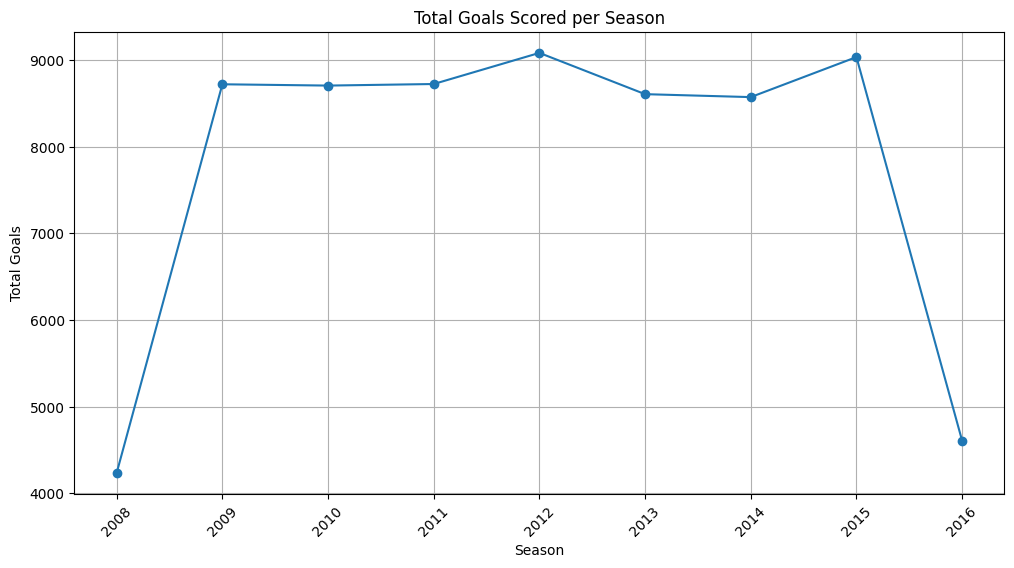

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

goals_per_season = final_df.groupby('season')[['home_team_goal', 'away_team_goal']].sum().sum(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(goals_per_season.index, goals_per_season.values, marker='o', linestyle='-')
plt.title('Total Goals Scored per Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Pregunta de Negocio:

¿Cómo puede influir esta tendencia en las decisiones de los equipos para preparar una temporada? ¿Existen ciertos períodos del año donde deberían ajustar su estilo de juego?


##Parte 3: Análisis del Impacto de los Atributos del Equipo (20 Puntos)


3.1 Crosstab para Analizar la Relación entre Atributos y Goles (10 Puntos)
Usamos una tabla cruzada para ver si hay alguna correlación entre los atributos del equipo, como la velocidad del juego, y el número de goles anotados.

In [17]:
import pandas as pd

final_df['buildUpPlaySpeed_bins'] = pd.cut(final_df['home_buildUpPlaySpeed'], bins=[0, 30, 60, 90, 100], labels=['Slow', 'Medium', 'Fast', 'Very Fast'])

crosstab = pd.crosstab(final_df['buildUpPlaySpeed_bins'], final_df['home_team_goal'])

print(crosstab)



home_team_goal         0  1  2  3  4
buildUpPlaySpeed_bins               
Slow                   0  1  1  1  0
Medium                 2  5  5  0  1
Fast                   3  1  1  1  2


Pregunta de Negocio:

¿Existe alguna relación clara entre la velocidad del juego de un equipo y el número de goles que anotan? ¿Cómo podrían usar los equipos esta información para ajustar sus estrategias?

La tabla permite ver que existe una correlacion entre más goles anotados y una velocidad de juego rápida. Y que en un juego de velocidad media, se pueden esperar goles.

3.2 Visualización de la Relación entre Velocidad y Goles (10 Puntos)
Creamos un gráfico de barras apiladas para representar cómo la velocidad del juego está relacionada con el número de goles anotados.

<ipython-input-7-07092eab8605>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = final_df.groupby(['buildUpPlaySpeed_bins', 'home_team_goal'])['home_team_goal'].count().unstack()


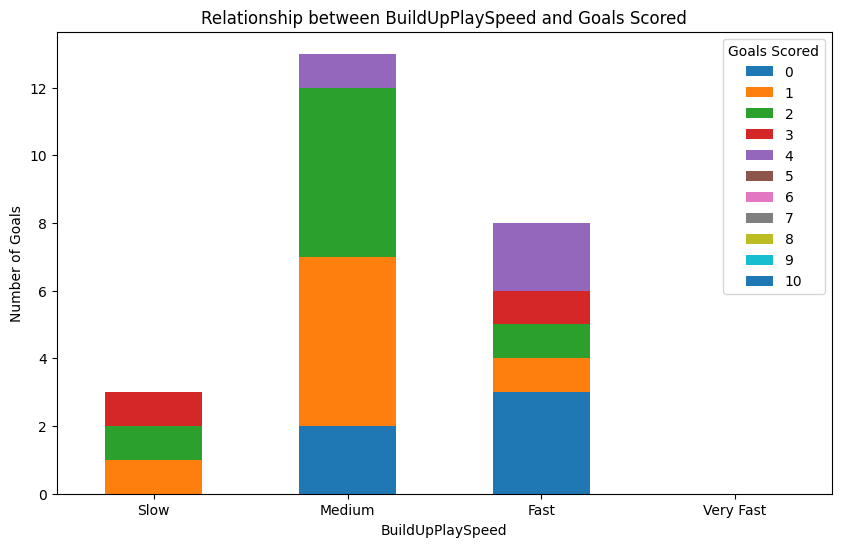

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = final_df.groupby(['buildUpPlaySpeed_bins', 'home_team_goal'])['home_team_goal'].count().unstack()

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between BuildUpPlaySpeed and Goals Scored')
plt.xlabel('BuildUpPlaySpeed')
plt.ylabel('Number of Goals')
plt.legend(title='Goals Scored')
plt.xticks(rotation=0)
plt.show()


Pregunta de Negocio:

¿Cómo puede esta información influir en las decisiones tácticas? Si los equipos que juegan a alta velocidad marcan más goles, ¿deberían todos los equipos intentar jugar más rápido?

Si vemos la gráfica de barras, notamos que los equipos que juegan rápido suelen meter más goles. Por eso, los equipos podrían cambiar sus tácticas de ataque y defensa. La velocidad del juego es una herramienta táctica más, que los equipos pueden usar con inteligencia para adaptarse

##Parte 4: Uso de Pivot Tables para Análisis Comparativo (20 Puntos)


4.1 Pivot Table para Análisis de Goles por Temporada y Estilo de Juego (10 Puntos)
Creamos una pivot table para comparar cómo el estilo de juego de los equipos influye en el promedio de goles por temporada.

In [18]:
pivot_table = pd.pivot_table(final_df,values='home_team_goal', index='season', columns='buildUpPlaySpeed_bins',aggfunc='mean',)
print(pivot_table)


buildUpPlaySpeed_bins  Slow    Medium  Fast
season                                     
2010                    1.5       NaN   NaN
2011                    NaN  1.000000   1.5
2012                    NaN  2.000000   2.0
2013                    3.0  1.500000   2.5
2014                    NaN  1.285714   0.0


<ipython-input-18-090690062944>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(final_df,values='home_team_goal', index='season', columns='buildUpPlaySpeed_bins',aggfunc='mean',)


Pregunta de Negocio:

¿Qué estilos de juego han sido más efectivos a lo largo de las temporadas? ¿Los equipos deberían adaptar su estrategia en función del tipo de juego que otros equipos han utilizado con éxito en cada temporada?


 Los equipos que implementan un estilo de juego con mayor velocidad en la construcción de jugadas ("buildUpPlaySpeed" rápido) han evidenciado una mayor efectividad a lo largo de las temporadas, lo cual se refleja en un promedio de goles superior.

4.2 Visualización Comparativa del Estilo de Juego (10 Puntos)
Visualizamos los resultados de la pivot table utilizando un gráfico de barras apiladas para comparar los promedios de goles por temporada y estilo de juego.

<ipython-input-20-7f45d097c333>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(final_df,values='home_team_goal',index='season',columns='buildUpPlaySpeed_bins',aggfunc='mean',)


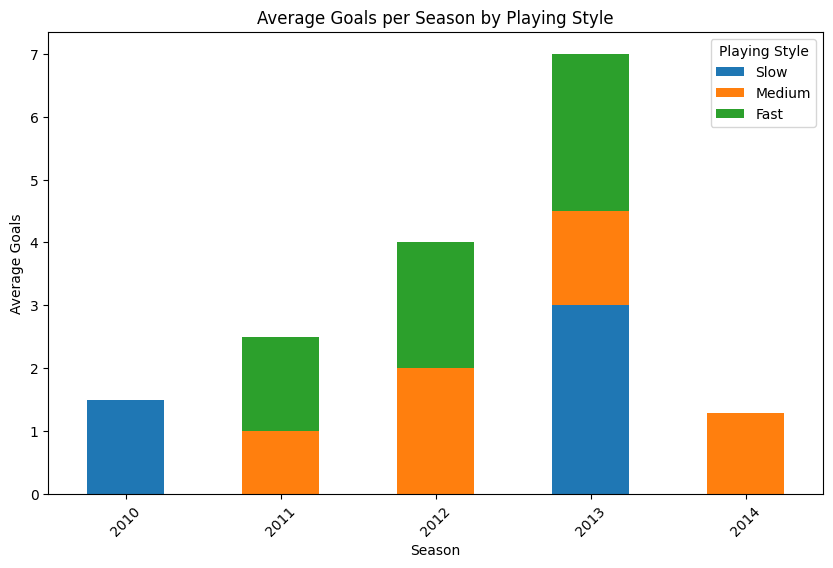

In [20]:
pivot_table = pd.pivot_table(final_df,values='home_team_goal',index='season',columns='buildUpPlaySpeed_bins',aggfunc='mean',)

pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Average Goals per Season by Playing Style')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.legend(title='Playing Style')
plt.xticks(rotation=45)
plt.show()


Pregunta de Negocio:

¿Cómo puede el análisis de los estilos de juego ayudar a los equipos a decidir cómo enfrentar a sus oponentes en futuras temporadas? ¿Deberían cambiar su estilo de juego según los rivales?

##Parte 5: Conclusión y Storytelling (20 Puntos)
5.1 Storytelling Basado en los Insights

Obtenidos (10 Puntos)
Con base en todos los análisis anteriores, redacta una narrativa que explique los insights obtenidos. Asegúrate de incluir cómo la tendencia de los goles y el estilo de juego de los equipos ha evolucionado con el tiempo.

Puntos a incluir en el Storytelling:

¿Qué equipos han sido los más dominantes en las últimas temporadas y por qué?
¿Cómo han cambiado los estilos de juego y cómo eso ha influido en los resultados?
¿Qué tipo de ajustes tácticos pueden hacer los equipos según los resultados de este análisis?


5.2 Conclusión y Recomendaciones Finales (10 Puntos)
Proporciona una conclusión basada en el análisis y da recomendaciones prácticas para los equipos. Considera cómo los datos analizados pueden ayudar en la toma de decisiones estratégicas, como la compra de jugadores, tácticas de juego, y preparación para futuras temporadas.